# **Import file and package**

> The data used can be accessed via the following [link](https://www.kaggle.com/hellbuoy/car-price-prediction) 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/content/CarPrice_Assignment.csv')

#**Explanatory Data Analysis**



In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Based on the information above, there are several variables of categorical type detected as objects. Therefore, we will change the data type to categorical.

In [5]:
#We can remove some variable that are not really needed such as car_ID, symboling, and CarName variable
df2 = df.drop(labels=['car_ID', 'symboling','CarName'], axis=1)

In [6]:
#Check for duplicated data
print(df2.shape)
df2.duplicated().sum()

(205, 23)


1

There is one duplicate data, it will be deleted

In [7]:
#Remove for duplicated data
df2.drop_duplicates(inplace=True)
print(df2.shape)
print(df2.duplicated().sum())

(204, 23)
0


By using this method, we leave only one observation of the duplicated data

In [8]:
#Check for missing value
print(df2.isnull().sum())

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


There is no missing value in the data

In [9]:
#Change data of object type to categorical
convert = { 'fueltype': 'category',
                'aspiration': 'category',
                'doornumber': 'category',
                'carbody': 'category',
                'drivewheel': 'category',
                'enginelocation': 'category',
                'enginetype': 'category',
                'cylindernumber': 'category',
                'fuelsystem': 'category',
               } 
df2 = df2.astype(convert) 
print(df2.dtypes) 

fueltype            category
aspiration          category
doornumber          category
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber      category
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
dtype: object


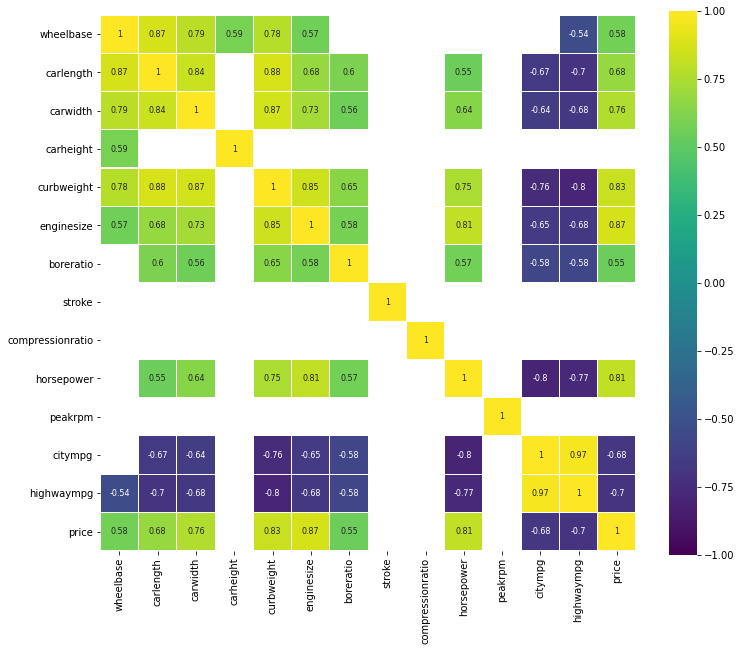

In [10]:
#Checking the correlation between variables
correlation = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

The picture above shows variables that have a correlation with other variables. If the correlation is close to 1 or -1, then the relationship between these variables is getting stronger.

#**Count Plot for Categorical Variable**



Let say we only want to look at the number of observation for each categorical variables, we can do it by using count plot from seaborn package.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


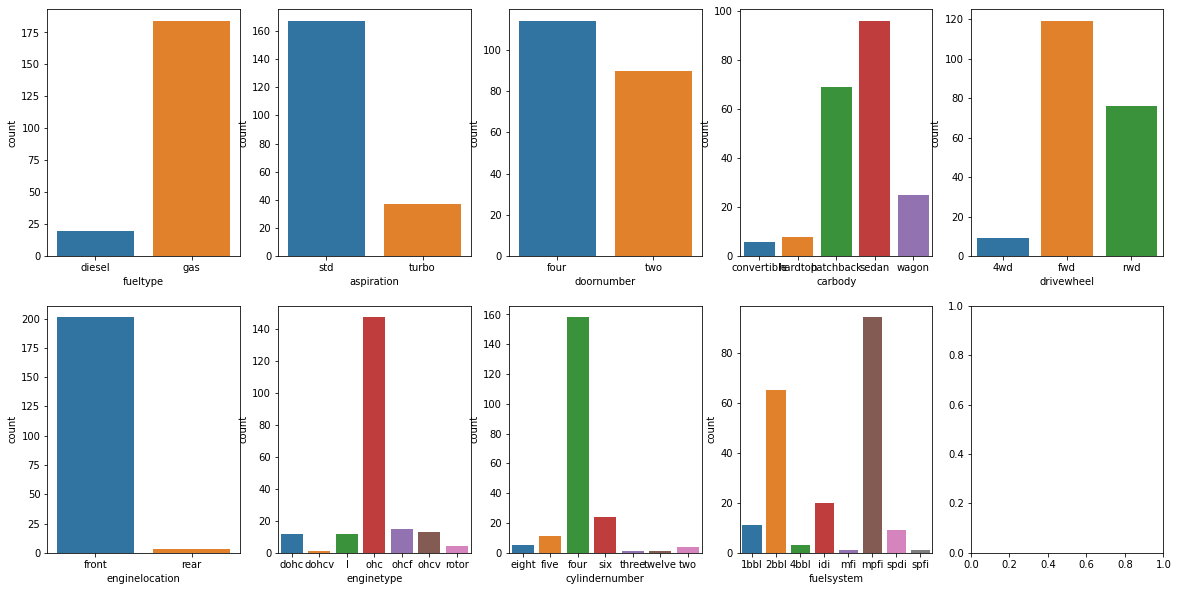

In [11]:
#Frequency for categorical type variables
categorical = df2.select_dtypes(include = ['category']).columns
fig, ax = plt.subplots(2,5, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df2[variable], ax=subplot)

#**Histogram for Numerical Variable**

In addition, we also can look at the number of observation for each numerical variables by using histogram. 

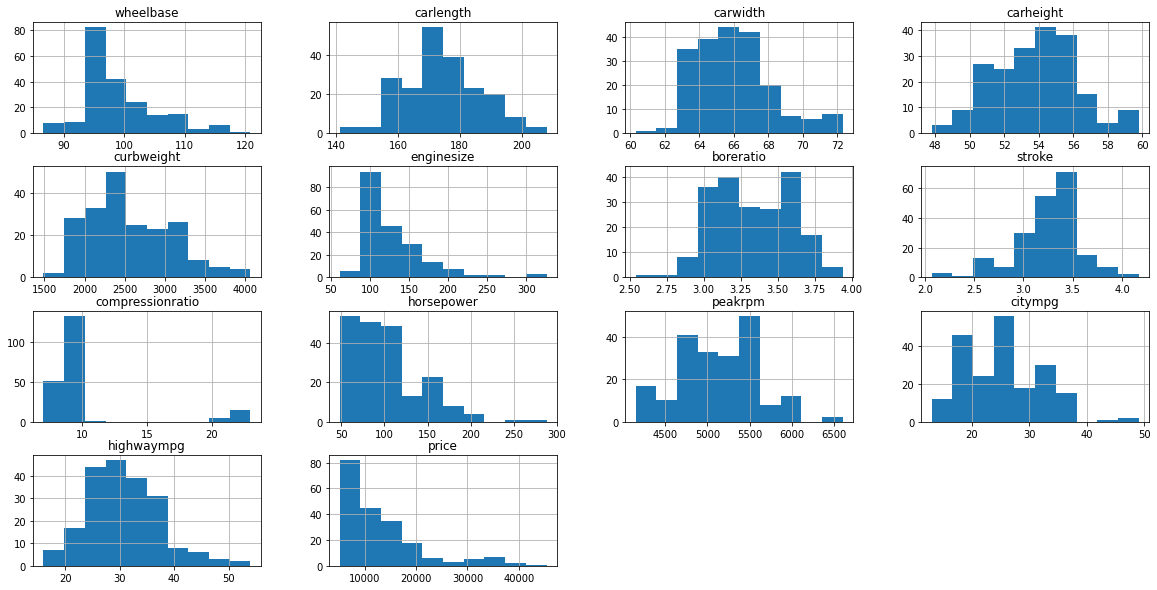

In [12]:
#Frequency for numerical type variables
numerical = df2.select_dtypes(include = ['int64','float64']).columns
df2[numerical].hist(figsize=(20, 10), layout=(4, 4));

#**CatPlot for Categorical Variable**

Furthermore, we can use CatPlot from seaborn package. In this way, we can compare categorical variable based on it prices. So we can get more information about the specifications of the car based on the price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

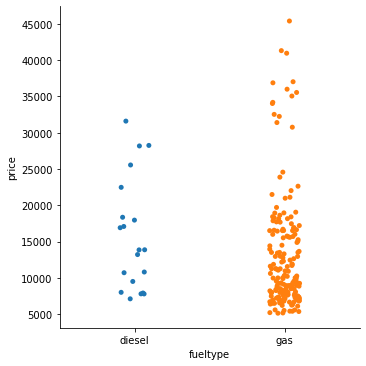

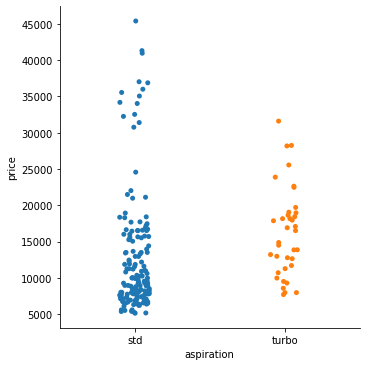

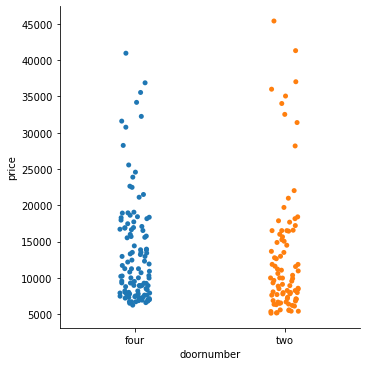

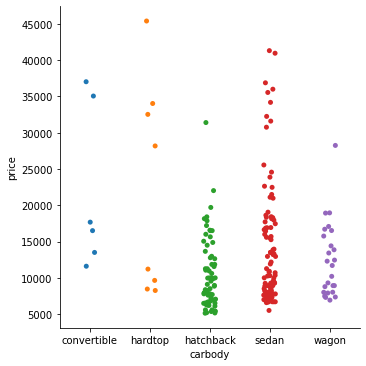

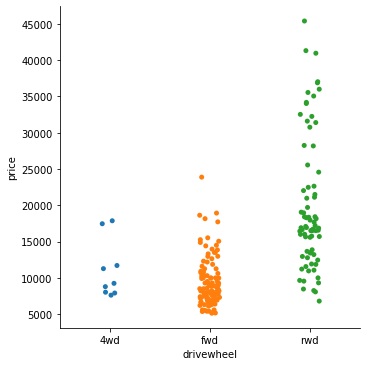

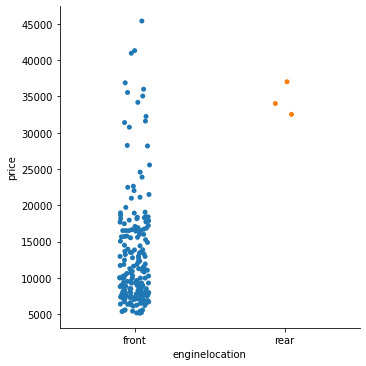

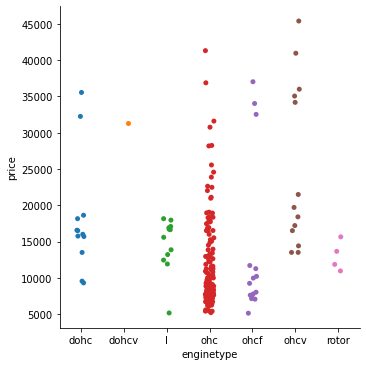

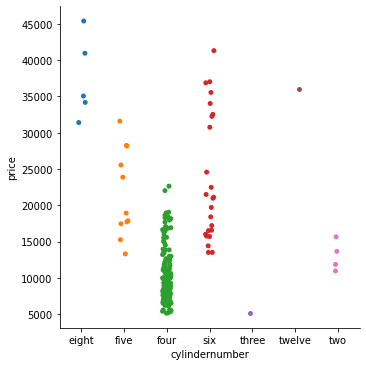

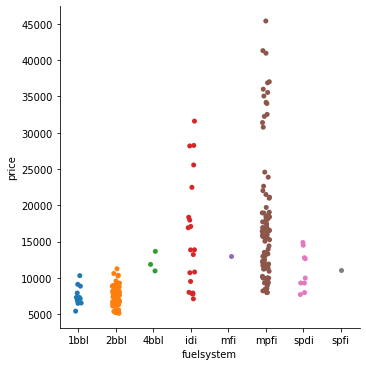

In [13]:
#Visualization for categorical variables on car prices
vs_price = df2.select_dtypes(include = ['category']).columns
for variable in vs_price:
    sns.catplot(df2[variable], y='price', data=df2)

If we want to see further categorical variables based on a particular category, we can add a "hue" statement. For example:

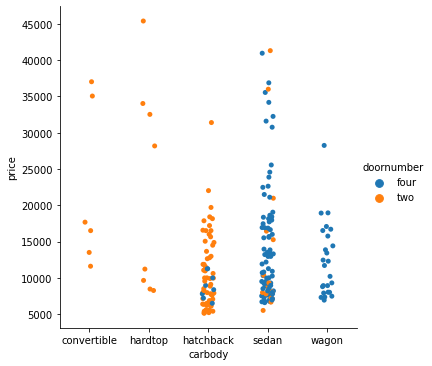

In [18]:
sns.catplot(x='carbody', y='price', hue='doornumber', data=df2)

Based on the picture above, we can conclude that cars that have convertible, hardtop, and hatchback bodies are more likely to have two doors, while cars that have sedan and wagon bodies are more likely to have four doors.

#**Scatter Plot for Numerical Variable**

Scatter plot is similar to catplot, but scatter plot is used to numerical variable.

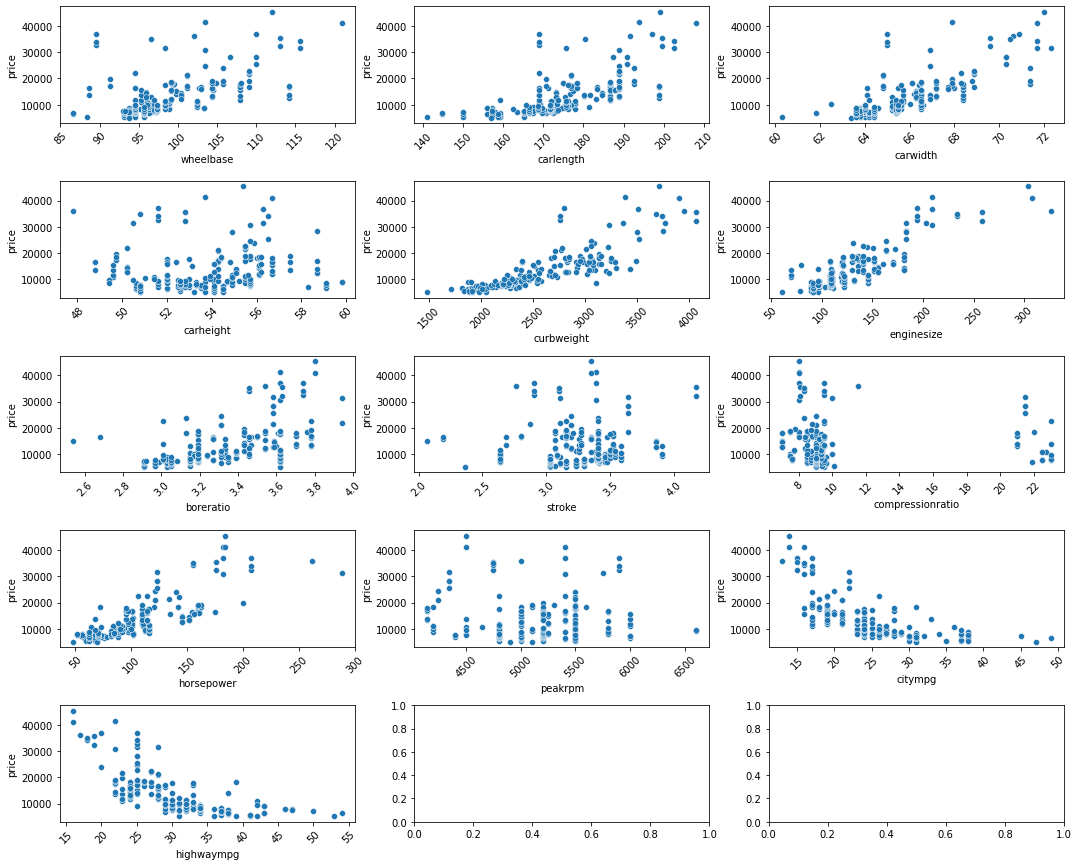

In [14]:
#Visualization for numerical variables on car prices
col = numerical.drop(labels=['price'])

fig,axes = plt.subplots(5,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df2, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

Based on the picture above, the variables that seem to have a linear relationship with the price of a car are as follows:
1. highwaympg
2. citympg
3. horsepower
4. enginesize
5. curbweight
6. carwidth
7. carlength
8. boreratio
9. wheelbase

It means, every increase in one unit variable that has a linear relationship with price, the price will increase or decrease. For example in the enginesize variable, it can be seen that every increase in engine size, the price of the car will increase.

We can add a "hue" statement too. For example:

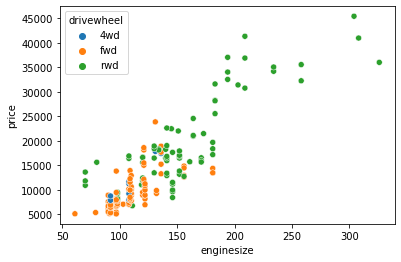

In [23]:
sns.scatterplot(x='enginesize', y='price', hue='drivewheel', data=df2)

Based on the picture above, we can conclude that cars that have rwd drive wheels tend to be more expensive.